In [1]:
from collections import Counter
from math import sqrt
from random import Random
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
import string
import re
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse import csc_matrix
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import svds
#from scipy.stats.stats import spearmanr
from scipy.stats import spearmanr
from random import shuffle
import math
import random
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
#from sparsesvd import sparsesvd
from numpy.linalg import matrix_rank
from scipy.stats import chi2_contingency
from matplotlib.pyplot import *
from numpy import inf
from scipy.linalg import svd
from foobar import *

In [3]:
test_files = ['wordsim353.txt', 'men_dataset.txt', 'mturk.txt', 'rarewords.txt', 'simlex999.txt']

dim_range1 = [2, 50]
dim_range2 = list(np.arange(100, 1001, 100))
dim_range3 = list(np.arange(2000, 10001, 1000))
dim_range = [*dim_range1, *dim_range2, *dim_range3]
eig_weight = [0, 0.5]
eig_weight_str = ['0', '0.5']
eig_weight_str_name = ['0', '0dot5']

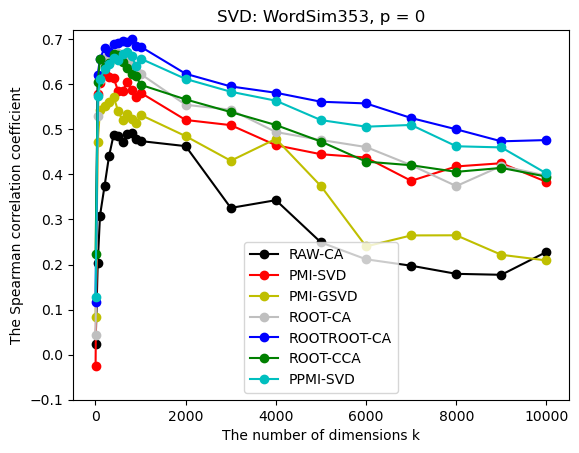

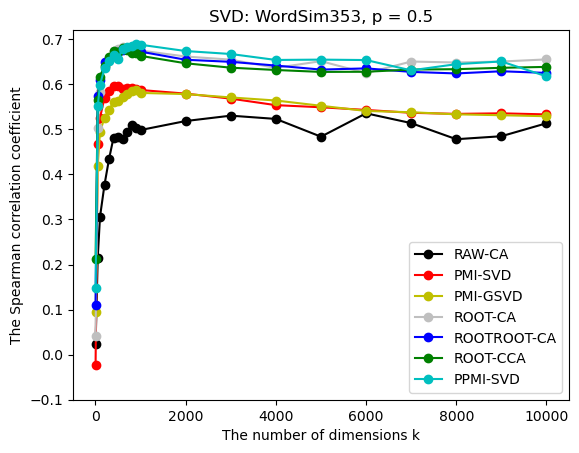

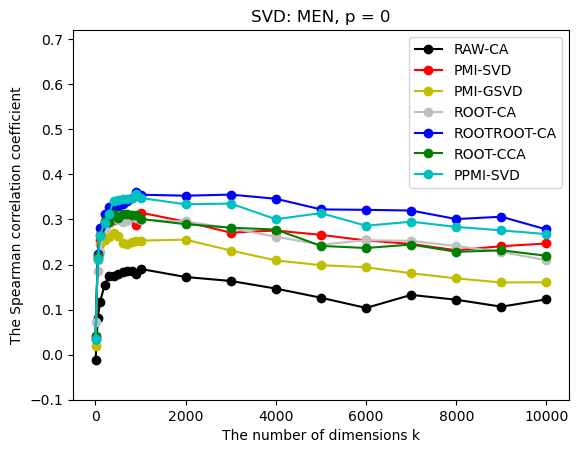

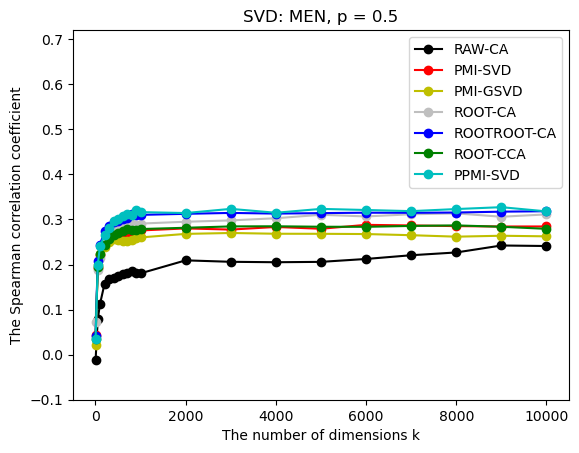

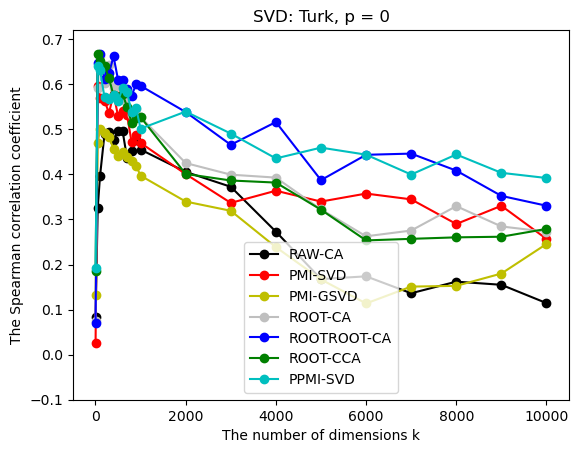

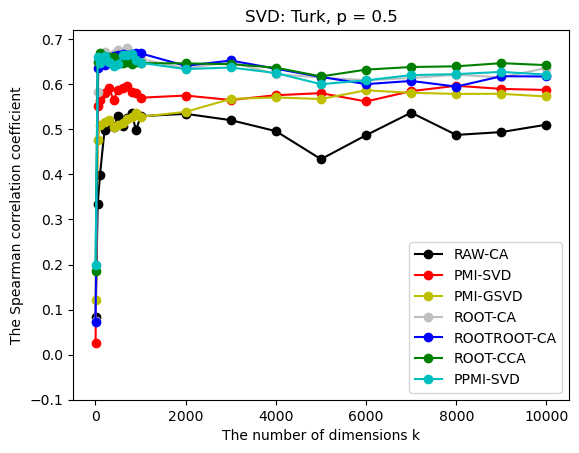

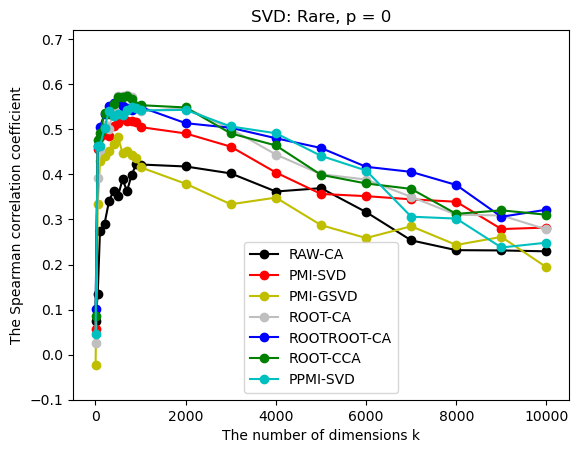

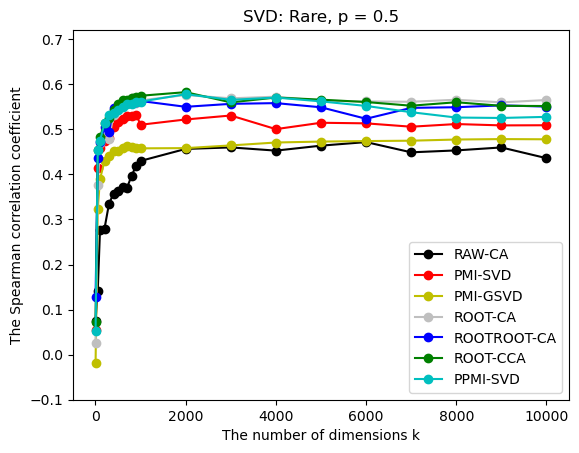

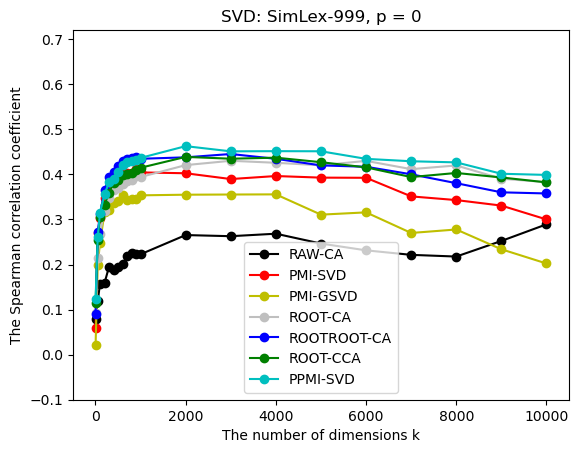

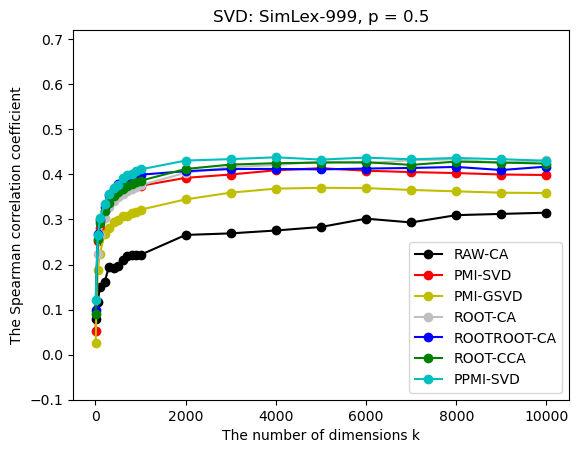

In [7]:
#This is to plot the figures: p = 0, 0.5. This is used in the paper for Figure B.3.
eig_weight_005 = [0, 0.5]
eig_weight_str_005 = ['0', '0.5']
eig_weight_str_name_005 = ['0', '0dot5']
folder = "wiki"
col = ["ko-", "ro-", "yo-", "0.75", "bo-", "go-", "co-", "mo-", "wo-"]
test_files_name = ['WordSim353', 'MEN', 'Turk', 'Rare', 'SimLex-999']
table3 = ["raw_ca","pmi_svd", "pmi_gsvd", "root_ca", "rootroot_ca", "rootcca_svd", "ppmi_svd"]
index_list = np.tile(["RAW-CA", "PMI-SVD", "PMI-GSVD", "ROOT-CA", "ROOTROOT-CA", "ROOT-CCA", "PPMI-SVD", "GloVe", "SGNS"], 6)
for ntest in range(len(test_files_name)):
    for neigwei in range(len(eig_weight_005)):
            for i in range(len(table3)):
                thr10000namewsscoresi = np.load("thr10000_"+table3[i]+"_ws_score_cos_all.npy")
                if col[i] == "0.75": 
                    plt.plot(dim_range, thr10000namewsscoresi[ntest][:, neigwei], color="0.75", marker="o", linestyle="-", label = index_list[i])
                else:
                    plt.plot(dim_range, thr10000namewsscoresi[ntest][:, neigwei], col[i], label = index_list[i])
            plt.legend()
            plt.xlabel('The number of dimensions k')
            plt.ylabel('The Spearman correlation coefficient')
            plt.title("SVD: "+test_files_name[ntest]+", p = "+ eig_weight_str_005[neigwei])
            plt.ylim(-0.1, 0.72)
            plt.savefig(folder+"SVD"+test_files_name[ntest]+eig_weight_str_name_005[neigwei]+".png")
            plt.show()
            plt.close()

In [5]:
#This is to calculate rho to create Table 3 in the paper

table3 = ["ttest", "pmi", "ppmi", "pmi_g", "root_ttest", "rootroot_ttest", "rootcca"]

n_met = len(table3)

index_list = np.tile(["&TTEST", "&PMI", "&PPMI", "&WPMI", "&ROOT-TTEST", "&ROOTROOT-TTEST", "&DEC-ROOTCCA"], 6)

dfone = pd.DataFrame()

df = pd.DataFrame()
for k in range(len(test_files)):
    for i in range(len(table3)): 
        test_type = test_files[k]
        thr10000namewsscoresi = np.load("table2\\thr10000_ws_score_"+table3[i]+".npy")
        thr10000temp = pd.DataFrame({
                             "rho":[thr10000namewsscoresi[k][2].astype(float)]})
        
        dfone["thr10000_rho"] = thr10000temp["rho"]

        df = df.append(dfone, ignore_index=True)

for k in range(len(table3)): 

    dfone["thr10000_rho"] = df["thr10000_rho"][k]+df["thr10000_rho"][k+n_met]+df["thr10000_rho"][k+2*n_met]+df["thr10000_rho"][k+3*n_met]+df["thr10000_rho"][k+4*n_met]

    df = df.append(dfone, ignore_index=True)
df.index = index_list

df["thr10000_rho"] = round(df["thr10000_rho"],3)


latex_table = df.to_latex()
print(latex_table)

\begin{tabular}{lr}
\toprule
{} &  thr10000\_rho \\
\midrule
\&TTEST          &         0.515 \\
\&PMI            &         0.224 \\
\&PPMI           &         0.606 \\
\&WPMI           &         0.369 \\
\&ROOT-TTEST     &         0.588 \\
\&ROOTROOT-TTEST &         0.507 \\
\&DEC-ROOTCCA    &         0.438 \\
\&TTEST          &         0.208 \\
\&PMI            &         0.137 \\
\&PPMI           &         0.262 \\
\&WPMI           &         0.178 \\
\&ROOT-TTEST     &         0.251 \\
\&ROOTROOT-TTEST &         0.236 \\
\&DEC-ROOTCCA    &         0.141 \\
\&TTEST          &         0.567 \\
\&PMI            &         0.414 \\
\&PPMI           &         0.636 \\
\&WPMI           &         0.477 \\
\&ROOT-TTEST     &         0.657 \\
\&ROOTROOT-TTEST &         0.620 \\
\&DEC-ROOTCCA    &         0.551 \\
\&TTEST          &         0.436 \\
\&PMI            &         0.256 \\
\&PPMI           &         0.479 \\
\&WPMI           &         0.312 \\
\&ROOT-TTEST     &         0.497 \\
\&R

C:\Users\qi000005\AppData\Local\Temp\ipykernel_20592\1349123414.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dfone, ignore_index=True)
C:\Users\qi000005\AppData\Local\Temp\ipykernel_20592\1349123414.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dfone, ignore_index=True)
C:\Users\qi000005\AppData\Local\Temp\ipykernel_20592\1349123414.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dfone, ignore_index=True)
C:\Users\qi000005\AppData\Local\Temp\ipykernel_20592\1349123414.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dfone, ignore_index=True)
C:\Users\qi0

In [7]:
#This is to create table 5, part of RAW-CA, PMI-SVD, PPMI-SVD, PMI-GSVD, ROOT-CA, ROOTROOT-CA, ROOT-CCA
table3 = ["raw_ca", "pmi_svd", "ppmi_svd", "pmi_gsvd", "root_ca", "rootroot_ca", "rootcca_svd"]
index_list = np.tile(["&RAW-CA", "&PMI-SVD", "&PPMI-SVD", "&PMI-GSVD", "&ROOT-CA", "&ROOTROOT-CA", "&ROOT-CCA"], 6)
n_met = len(table3)
pindex = [0, 1]
dfone = pd.DataFrame()

df_svd_ca = pd.DataFrame()
for k in range(len(test_files)):
    for i in range(len(table3)): 
        test_type = test_files[k]
        thr10000namewsscoresi = np.load("thr10000_"+table3[i]+"_ws_score_cos_all.npy")
        
        thr10000tempp0 = pd.DataFrame({
                             "kdim":[dim_range[thr10000namewsscoresi[k][:, pindex[0]].argmax()]],
                             "rho":[thr10000namewsscoresi[k][:, pindex[0]].max()]})

        dfone["thr10000_kdimp0"] = thr10000tempp0["kdim"]
        dfone["thr10000_rhop0"] = thr10000tempp0["rho"]
       
        thr10000tempp1 = pd.DataFrame({
                             "kdim":[dim_range[thr10000namewsscoresi[k][:, pindex[1]].argmax()]],
                             "rho":[thr10000namewsscoresi[k][:, pindex[1]].max()]})

        dfone["thr10000_kdimp1"] = thr10000tempp1["kdim"]
        dfone["thr10000_rhop1"] = thr10000tempp1["rho"]

        
        df_svd_ca = df_svd_ca.append(dfone, ignore_index=True)
        

for k in range(len(table3)):        
    dfone["thr10000_kdimp0"] = ""
    dfone["thr10000_rhop0"] = df_svd_ca["thr10000_rhop0"][k]+df_svd_ca["thr10000_rhop0"][k+n_met]+df_svd_ca["thr10000_rhop0"][k+2*n_met]+df_svd_ca["thr10000_rhop0"][k+3*n_met]+df_svd_ca["thr10000_rhop0"][k+4*n_met]
    dfone["thr10000_kdimp1"] = ""
    dfone["thr10000_rhop1"] = df_svd_ca["thr10000_rhop1"][k]+df_svd_ca["thr10000_rhop1"][k+n_met]+df_svd_ca["thr10000_rhop1"][k+2*n_met]+df_svd_ca["thr10000_rhop1"][k+3*n_met]+df_svd_ca["thr10000_rhop1"][k+4*n_met]

    df_svd_ca = df_svd_ca.append(dfone, ignore_index=True)


df_svd_ca.index = index_list

df_svd_ca["thr10000_rhop0"] = round(df_svd_ca["thr10000_rhop0"],3)

df_svd_ca["thr10000_rhop1"] = round(df_svd_ca["thr10000_rhop1"],3)


latex_table = df_svd_ca.to_latex()
print(latex_table)

\begin{tabular}{llrlr}
\toprule
{} & thr10000\_kdimp0 &  thr10000\_rhop0 & thr10000\_kdimp1 &  thr10000\_rhop1 \\
\midrule
\&RAW-CA      &             800 &           0.493 &            6000 &           0.535 \\
\&PMI-SVD     &             200 &           0.624 &             500 &           0.597 \\
\&PPMI-SVD    &             700 &           0.672 &             900 &           0.688 \\
\&PMI-GSVD    &             400 &           0.572 &             900 &           0.586 \\
\&ROOT-CA     &             500 &           0.669 &             600 &           0.682 \\
\&ROOTROOT-CA &             800 &           0.700 &             800 &           0.679 \\
\&ROOT-CCA    &             400 &           0.667 &             600 &           0.681 \\
\&RAW-CA      &            1000 &           0.190 &            9000 &           0.242 \\
\&PMI-SVD     &            1000 &           0.315 &            6000 &           0.288 \\
\&PPMI-SVD    &             900 &           0.357 &            9000 &       

C:\Users\qi000005\AppData\Local\Temp\ipykernel_20592\1089827091.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_svd_ca = df_svd_ca.append(dfone, ignore_index=True)
C:\Users\qi000005\AppData\Local\Temp\ipykernel_20592\1089827091.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_svd_ca = df_svd_ca.append(dfone, ignore_index=True)
C:\Users\qi000005\AppData\Local\Temp\ipykernel_20592\1089827091.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_svd_ca = df_svd_ca.append(dfone, ignore_index=True)
C:\Users\qi000005\AppData\Local\Temp\ipykernel_20592\1089827091.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_svd_ca =

In [10]:
#This is used in the paper: the proportion of 0 in PMI matrix of wiki

wiki_pmi = np.load("decomposed matrix\\thr10000_pmi.npy")
wiki_pmi_unique, wiki_pmi_frequency = np.unique(wiki_pmi,
                              return_counts = True)
wiki_pmi_indices = np.where(wiki_pmi_unique == 0)
wiki_pmi_unique_del0 = np.delete(wiki_pmi_unique, wiki_pmi_indices)
wiki_pmi_frequency_del0 = np.delete(wiki_pmi_frequency, wiki_pmi_indices)
print(wiki_pmi_frequency[wiki_pmi_indices]/np.sum(wiki_pmi_frequency))
print(np.sum(wiki_pmi_frequency[np.where(wiki_pmi_unique < 0)])/np.sum(wiki_pmi_frequency))
print(np.sum(wiki_pmi_frequency[np.where(wiki_pmi_unique > 0)])/np.sum(wiki_pmi_frequency))

[0.5680936]
0.2794577205109962
0.1524486776810708


In [11]:
wiki_pmi

array([[ -0.14315994,   4.90473921,   1.23427118, ...,   0.        ,
          0.        ,   0.        ],
       [  4.90473921,   5.12836096,   1.6838816 , ...,   0.        ,
          0.        ,   0.        ],
       [  1.23427118,   1.6838816 ,  -1.66454778, ...,   0.56361809,
        -13.1518593 ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.56361809, ...,   7.75036094,
          0.        ,   0.        ],
       [  0.        ,   0.        , -13.1518593 , ...,   0.        ,
          0.        ,  13.05530489],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
         13.05530489,   0.        ]])

In [13]:
wiki_cooccur_dense = np.load("cooccur_dense_thr10000.npy")
P = wiki_cooccur_dense / np.sum(wiki_cooccur_dense)
w = np.array(P.sum(axis = 1))
c = np.array(P.sum(axis=0)).T
D_w_recip = np.diag(np.reciprocal(w))
D_c_recip = np.diag(np.reciprocal(c))     
pmiwithoutlog = D_w_recip @ (P) @ D_c_recip -1
np.max(pmiwithoutlog)

118939.25103725037

In [3]:
#load PMI, PPMI, WPMI 

thr10000_pmi = np.load("decomposed matrix\\thr10000_pmi.npy")
thr10000_ppmi = np.load("decomposed matrix\\thr10000_ppmi.npy")
thr10000_pmi_gsvd = np.load("decomposed matrix\\thr10000_pmi_gsvd.npy")

thr10000_pmi_fla = thr10000_pmi.flatten()
thr10000_ppmi_fla = thr10000_ppmi.flatten()
thr10000_pmi_gsvd_fla = thr10000_pmi_gsvd.flatten()

In [2]:
#load TTEST, ROOT-TTEST, ROOTROOT-TTEST, STRATOS-TTEST

thr10000_ttest = np.load("decomposed matrix\\thr10000_ttest.npy")
thr10000_root_ttest = np.load("decomposed matrix\\thr10000_root_ttest.npy")
thr10000_rootroot_ttest = np.load("decomposed matrix\\thr10000_rootroot_ttest.npy")
thr10000_rootcca = np.load("decomposed matrix\\thr10000_rootcca.npy")

thr10000_ttest_fla = thr10000_ttest.flatten()
thr10000_root_ttest_fla = thr10000_root_ttest.flatten()
thr10000_rootroot_ttest_fla = thr10000_rootroot_ttest.flatten()
thr10000_rootcca_fla = thr10000_rootcca.flatten()

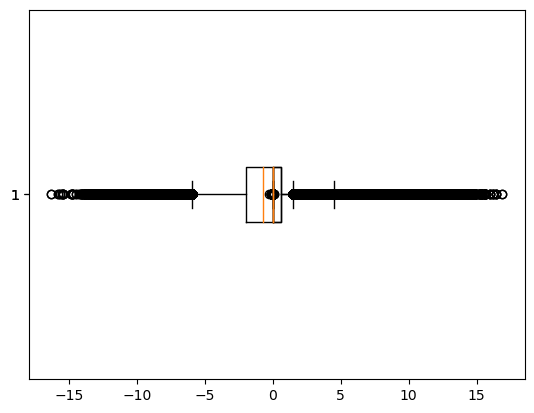

In [4]:
#Use the boxplot to calculate the number of extreme values for thr10000

whis_value = 1.5

# Plot histograms on separate subplots using plt.hist()
thr10000_pmi_fla_box = plt.boxplot(thr10000_pmi_fla[thr10000_pmi_fla != 0], whis = whis_value, vert = False)

thr10000_ppmi_fla_box = plt.boxplot(thr10000_ppmi_fla[thr10000_pmi_fla != 0], whis = whis_value, vert = False)

thr10000_pmi_gsvd_fla_box = plt.boxplot(thr10000_pmi_gsvd_fla[thr10000_pmi_fla != 0], whis = whis_value, vert = False)

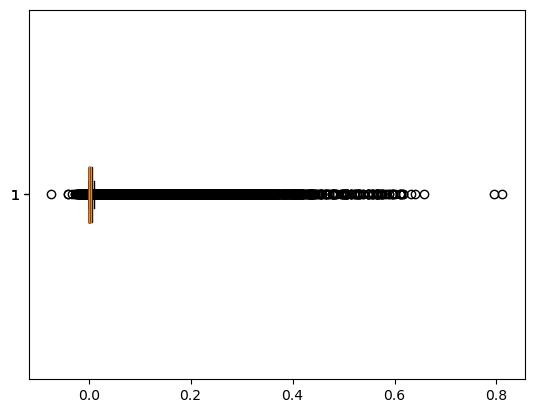

In [5]:
# Plot histograms on separate subplots using plt.hist()
thr10000_ttest_fla_box = plt.boxplot(thr10000_ttest_fla[thr10000_pmi_fla != 0], whis = whis_value, vert = False)

thr10000_root_ttest_fla_box = plt.boxplot(thr10000_root_ttest_fla[thr10000_pmi_fla != 0], whis = whis_value, vert = False)

thr10000_rootroot_ttest_fla_box = plt.boxplot(thr10000_rootroot_ttest_fla[thr10000_pmi_fla != 0], whis = whis_value, vert = False)

thr10000_rootcca_fla_box = plt.boxplot(thr10000_rootcca_fla[thr10000_pmi_fla != 0], whis = whis_value, vert = False)


In [6]:
#This is used for Table C.1


data1 = dict(PMI = [sum(thr10000_pmi_fla_box['fliers'][0].get_xdata() < thr10000_pmi_fla_box['whiskers'][0].get_xdata()[1]), sum(thr10000_pmi_fla_box['fliers'][0].get_xdata() > thr10000_pmi_fla_box['whiskers'][1].get_xdata()[1]), len(thr10000_pmi_fla_box['fliers'][0].get_xdata())],
       PPMI = [sum(thr10000_ppmi_fla_box['fliers'][0].get_xdata() < thr10000_ppmi_fla_box['whiskers'][0].get_xdata()[1]), sum(thr10000_ppmi_fla_box['fliers'][0].get_xdata() > thr10000_ppmi_fla_box['whiskers'][1].get_xdata()[1]), len(thr10000_ppmi_fla_box['fliers'][0].get_xdata())],
       WPMI = [sum(thr10000_pmi_gsvd_fla_box['fliers'][0].get_xdata() < thr10000_pmi_gsvd_fla_box['whiskers'][0].get_xdata()[1]), sum(thr10000_pmi_gsvd_fla_box['fliers'][0].get_xdata() > thr10000_pmi_gsvd_fla_box['whiskers'][1].get_xdata()[1]), len(thr10000_pmi_gsvd_fla_box['fliers'][0].get_xdata())],
       RAWTTEST = [sum(thr10000_ttest_fla_box['fliers'][0].get_xdata() < thr10000_ttest_fla_box['whiskers'][0].get_xdata()[1]), sum(thr10000_ttest_fla_box['fliers'][0].get_xdata() > thr10000_ttest_fla_box['whiskers'][1].get_xdata()[1]), len(thr10000_ttest_fla_box['fliers'][0].get_xdata())],
       ROOTTTEST = [sum(thr10000_root_ttest_fla_box['fliers'][0].get_xdata() < thr10000_root_ttest_fla_box['whiskers'][0].get_xdata()[1]), sum(thr10000_root_ttest_fla_box['fliers'][0].get_xdata() > thr10000_root_ttest_fla_box['whiskers'][1].get_xdata()[1]), len(thr10000_root_ttest_fla_box['fliers'][0].get_xdata())],
       ROOTROOTTTEST = [sum(thr10000_rootroot_ttest_fla_box['fliers'][0].get_xdata() < thr10000_rootroot_ttest_fla_box['whiskers'][0].get_xdata()[1]), sum(thr10000_rootroot_ttest_fla_box['fliers'][0].get_xdata() > thr10000_rootroot_ttest_fla_box['whiskers'][1].get_xdata()[1]), len(thr10000_rootroot_ttest_fla_box['fliers'][0].get_xdata())],
       STRATOSTTEST = [sum(thr10000_rootcca_fla_box['fliers'][0].get_xdata() < thr10000_rootcca_fla_box['whiskers'][0].get_xdata()[1]), sum(thr10000_rootcca_fla_box['fliers'][0].get_xdata() > thr10000_rootcca_fla_box['whiskers'][1].get_xdata()[1]), len(thr10000_rootcca_fla_box['fliers'][0].get_xdata())]
           )
df1 = pd.DataFrame(data1)
print(df1.T.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &        0 &         1 &         2 \\
\midrule
PMI           &   360804 &   1088525 &   1449329 \\
PPMI          &        0 &  13333552 &  13333552 \\
WPMI          &  8329451 &   1494475 &   9823926 \\
RAWTTEST      &  4829690 &   7961062 &  12790752 \\
ROOTTTEST     &   404134 &   5524112 &   5928246 \\
ROOTROOTTTEST &   140723 &   2787901 &   2928624 \\
STRATOSTTEST  &        0 &   7642196 &   7642196 \\
\bottomrule
\end{tabular}



C:\Users\qi000005\AppData\Local\Temp\ipykernel_18212\2500410227.py:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df1.T.to_latex())


In [8]:
#Calculate the most extreme value for PMI of wiki
#load vacobulary of vocabthr10000
thr10000_vocab = np.load("vocabthr10000_dic_index.npy", allow_pickle=True)
thr10000_vocab = dict(enumerate(thr10000_vocab.flatten(), 1))[1]
words = []
for i in thr10000_vocab:
    words.append(i)
    
thr10000_pmi_square = thr10000_pmi ** 2
thr10000_pmi_square_pro = thr10000_pmi_square / np.sum(thr10000_pmi_square)

temp_thr10000_pmi_square = np.where(thr10000_pmi_square_pro == np.max(thr10000_pmi_square_pro))
print(temp_thr10000_pmi_square)
print(thr10000_pmi_square_pro[temp_thr10000_pmi_square[0][0], temp_thr10000_pmi_square[1][0]], "("+words[temp_thr10000_pmi_square[0][0]]+", "+words[temp_thr10000_pmi_square[1][0]]+")")

(array([15131], dtype=int64), array([15131], dtype=int64))
6.353414851979518e-07 (stylefontsize, stylefontsize)


In [9]:
#Calculate the most extreme value for PPMI of wiki

thr10000_ppmi_square = thr10000_ppmi ** 2
thr10000_ppmi_square_pro = thr10000_ppmi_square / np.sum(thr10000_ppmi_square)

temp_thr10000_ppmi_square = np.where(thr10000_ppmi_square_pro == np.max(thr10000_ppmi_square_pro))
print(temp_thr10000_ppmi_square)
print(thr10000_ppmi_square_pro[temp_thr10000_ppmi_square[0][0], temp_thr10000_ppmi_square[1][0]], "("+words[temp_thr10000_ppmi_square[0][0]]+", "+words[temp_thr10000_ppmi_square[1][0]]+")")


(array([15131], dtype=int64), array([15131], dtype=int64))
2.180079596126659e-06 (stylefontsize, stylefontsize)


In [4]:
#Calculate the most extreme value for WPMI of wiki

thr10000_pmi_gsvd_square = thr10000_pmi_gsvd ** 2
thr10000_pmi_gsvd_square_pro = thr10000_pmi_gsvd_square / np.sum(thr10000_pmi_gsvd_square)

temp_thr10000_pmi_gsvd_square = np.where(thr10000_pmi_gsvd_square_pro == np.max(thr10000_pmi_gsvd_square_pro))
print(temp_thr10000_pmi_gsvd_square)
print(thr10000_pmi_gsvd_square_pro[temp_thr10000_pmi_gsvd_square[0][0], temp_thr10000_pmi_gsvd_square[1][0]], "("+words[temp_thr10000_pmi_gsvd_square[0][0]]+", "+words[temp_thr10000_pmi_gsvd_square[1][0]]+")")


(array([14], dtype=int64), array([14], dtype=int64))
0.01785677410088285 (the, the)


In [5]:
#Calculate the most extreme value for TTEST of wiki

thr10000_ttest_square = thr10000_ttest ** 2
thr10000_ttest_square_pro = thr10000_ttest_square / np.sum(thr10000_ttest_square)

temp_thr10000_ttest_square = np.where(thr10000_ttest_square_pro == np.max(thr10000_ttest_square_pro))
print(temp_thr10000_ttest_square)
print(thr10000_ttest_square_pro[temp_thr10000_ttest_square[0][0], temp_thr10000_ttest_square[1][0]], "("+words[temp_thr10000_ttest_square[0][0]]+", "+words[temp_thr10000_ttest_square[1][0]]+")")
print(thr10000_ttest_square_pro[temp_thr10000_ttest_square[1][0], temp_thr10000_ttest_square[0][0]], "("+words[temp_thr10000_ttest_square[1][0]]+", "+words[temp_thr10000_ttest_square[0][0]]+")")


(array([15131], dtype=int64), array([15131], dtype=int64))
0.013594206539062043 (stylefontsize, stylefontsize)
0.013594206539062043 (stylefontsize, stylefontsize)


In [6]:
#Calculate the most extreme value for ROOT-TTEST of wiki
thr10000_root_ttest_square = thr10000_root_ttest ** 2
thr10000_root_ttest_square_pro = thr10000_root_ttest_square / np.sum(thr10000_root_ttest_square)

temp_thr10000_root_ttest_square = np.where(thr10000_root_ttest_square_pro == np.max(thr10000_root_ttest_square_pro))
print(temp_thr10000_root_ttest_square)
print(thr10000_root_ttest_square_pro[temp_thr10000_root_ttest_square[0][0], temp_thr10000_root_ttest_square[1][0]], "("+words[temp_thr10000_root_ttest_square[0][0]]+", "+words[temp_thr10000_root_ttest_square[1][0]]+")")
print(thr10000_root_ttest_square_pro[temp_thr10000_root_ttest_square[1][0], temp_thr10000_root_ttest_square[0][0]], "("+words[temp_thr10000_root_ttest_square[1][0]]+", "+words[temp_thr10000_root_ttest_square[0][0]]+")")


(array([15128], dtype=int64), array([15128], dtype=int64))
0.018246363102983134 (classvcard, classvcard)
0.018246363102983134 (classvcard, classvcard)


In [7]:
#Calculate the most extreme value for ROOTROOT-TTEST of wiki
thr10000_rootroot_ttest_square = thr10000_rootroot_ttest ** 2
thr10000_rootroot_ttest_square_pro = thr10000_rootroot_ttest_square / np.sum(thr10000_rootroot_ttest_square)

temp_thr10000_rootroot_ttest_square = np.where(thr10000_rootroot_ttest_square_pro == np.max(thr10000_rootroot_ttest_square_pro))

print(temp_thr10000_rootroot_ttest_square)
print(thr10000_rootroot_ttest_square_pro[temp_thr10000_rootroot_ttest_square[0][0], temp_thr10000_rootroot_ttest_square[1][0]], "("+words[temp_thr10000_rootroot_ttest_square[0][0]]+", "+words[temp_thr10000_rootroot_ttest_square[1][0]]+")")
print(thr10000_rootroot_ttest_square_pro[temp_thr10000_rootroot_ttest_square[1][0], temp_thr10000_rootroot_ttest_square[0][0]], "("+words[temp_thr10000_rootroot_ttest_square[1][0]]+", "+words[temp_thr10000_rootroot_ttest_square[0][0]]+")")


(array([14882], dtype=int64), array([15121], dtype=int64))
0.004475778102488513 (stylewidth, emvotes)
0.004475778102488476 (emvotes, stylewidth)


In [8]:
#Calculate the most extreme value for STRATOS-TTEST of wiki
thr10000_rootcca_square = thr10000_rootcca ** 2
thr10000_rootcca_square_pro = thr10000_rootcca_square / np.sum(thr10000_rootcca_square)

temp_thr10000_rootcca_square = np.where(thr10000_rootcca_square_pro == np.max(thr10000_rootcca_square_pro))
print(temp_thr10000_rootcca_square)
print(thr10000_rootcca_square_pro[temp_thr10000_rootcca_square[0][0], temp_thr10000_rootcca_square[1][0]], "("+words[temp_thr10000_rootcca_square[0][0]]+", "+words[temp_thr10000_rootcca_square[1][0]]+")")
print(thr10000_rootcca_square_pro[temp_thr10000_rootcca_square[1][0], temp_thr10000_rootcca_square[0][0]], "("+words[temp_thr10000_rootcca_square[1][0]]+", "+words[temp_thr10000_rootcca_square[0][0]]+")")


(array([15131], dtype=int64), array([15131], dtype=int64))
0.00011959165463792472 (stylefontsize, stylefontsize)
0.00011959165463792472 (stylefontsize, stylefontsize)


In [2]:
dim = 100    

thr10000_pmi_svd_u = np.load("decomposed matrix\\thr10000_pmi_svd_u.npy")
thr10000_pmi_svd_s = np.load("decomposed matrix\\thr10000_pmi_svd_s.npy")
thr10000_pmi_svd_row_con_firstn_dim = ((thr10000_pmi_svd_s[0:dim]**2) * (thr10000_pmi_svd_u[:,0:dim]**2))/(thr10000_pmi_svd_s[0:dim]**2)

thr10000_ppmi_svd_u = np.load("decomposed matrix\\thr10000_ppmi_svd_u.npy")
thr10000_ppmi_svd_s = np.load("decomposed matrix\\thr10000_ppmi_svd_s.npy")
thr10000_ppmi_svd_row_con_firstn_dim = ((thr10000_ppmi_svd_s[0:dim]**2) * (thr10000_ppmi_svd_u[:,0:dim]**2))/(thr10000_ppmi_svd_s[0:dim]**2)

thr10000_pmi_gsvd_u = np.load("decomposed matrix\\thr10000_pmi_gsvd_u.npy")
thr10000_pmi_gsvd_s = np.load("decomposed matrix\\thr10000_pmi_gsvd_s.npy")
thr10000_pmi_gsvd_row_con_firstn_dim = ((thr10000_pmi_gsvd_s[0:dim]**2) * (thr10000_pmi_gsvd_u[:,0:dim]**2))/(thr10000_pmi_gsvd_s[0:dim]**2)


In [7]:
thr10000_pmi_gsvd_row_con_firstn_dim[14, :]

array([2.34657390e-02, 3.53684787e-01, 4.57081207e-02, 1.50082244e-01,
       3.50410120e-02, 3.50241997e-02, 5.61651439e-05, 1.58795034e-03,
       2.76130842e-02, 7.88295824e-03, 1.35068464e-05, 6.10905070e-03,
       1.19772134e-02, 7.97339531e-04, 1.61571606e-02, 7.77533138e-03,
       5.72463230e-03, 5.36142697e-02, 2.44099151e-04, 3.46439236e-02,
       3.22124505e-02, 3.30623080e-04, 1.71270717e-02, 3.13614851e-03,
       3.57304331e-03, 8.21358584e-03, 3.23916965e-03, 6.04672555e-03,
       1.22180461e-03, 8.99440803e-03, 1.58928516e-04, 2.53051324e-04,
       2.20364350e-03, 2.27821434e-03, 1.12888566e-04, 6.89299421e-03,
       9.32067558e-03, 8.77854420e-04, 2.92440473e-03, 1.85523024e-03,
       2.54956798e-04, 2.25273065e-05, 2.28763950e-04, 6.07574530e-03,
       2.08794948e-03, 9.14778956e-06, 2.35951781e-03, 1.02023945e-03,
       9.45959340e-04, 4.51171158e-05, 2.86560245e-04, 4.78572536e-04,
       3.07570941e-03, 9.10840033e-04, 7.51107992e-04, 7.35584877e-04,
      

In [6]:
#Finding the top 10 extrme values, corresponding to the rows for PPMI of wiki

num_ext = 10

thr10000_ppmi_index = [np.where(thr10000_ppmi == x) for x in sorted(thr10000_ppmi_fla[thr10000_pmi_fla != 0], reverse=True)[:num_ext]]

#Finding the top 10 extrme values, corresponding to the rows for WPMI of wiki
k = 5
thr10000_pmi_gsvd_index = [np.where(np.abs(thr10000_pmi_gsvd) == x) for x in sorted(np.abs(thr10000_pmi_gsvd_fla[thr10000_pmi_fla != 0]), reverse=True)[:k*num_ext]]
thr10000_pmi_gsvd_index_list = []
for i in range(k*num_ext):
    thr10000_pmi_gsvd_index_list.append(thr10000_pmi_gsvd_index[i][0][0])

res_list_thr10000_pmi_gsvd_index = []
for item in thr10000_pmi_gsvd_index_list: 
    if item not in res_list_thr10000_pmi_gsvd_index: 
        res_list_thr10000_pmi_gsvd_index.append(item)

In [35]:
num_ext = 10
i = 0
while i < num_ext:
    print(i)
    print(words[thr10000_ppmi_index[i][0][0]])
    print(words[thr10000_ppmi_index[i][1][0]])
    i = i+1

0
stylefontsize
stylefontsize
1
burkina
faso
2
faso
burkina
3
rowspan
rowspan
4
ltthgtlttrgt
ltthgtlttrgt
5
org
classfn
6
classfn
org
7
·
·
8
srctemplateawards
tablestylescss
9
tablestylescss
srctemplateawards


In [38]:
num_ext = 10
i = 0
while i < num_ext:
    print(i)
    print(words[res_list_thr10000_pmi_gsvd_index[i]])
    i = i+1

0
the
1
a
2
srcrefliststylescss
3
of
4
and
5
stylewidth
6
to
7
lttemplatestyles
8
his
9
in


In [45]:
thr10000_ppmi_index

[(array([15131], dtype=int64), array([15131], dtype=int64)),
 (array([11844], dtype=int64), array([11845], dtype=int64)),
 (array([11845], dtype=int64), array([11844], dtype=int64)),
 (array([15106], dtype=int64), array([15106], dtype=int64)),
 (array([14390], dtype=int64), array([14390], dtype=int64)),
 (array([15079], dtype=int64), array([15127], dtype=int64)),
 (array([15127], dtype=int64), array([15079], dtype=int64)),
 (array([13743], dtype=int64), array([13743], dtype=int64)),
 (array([14943], dtype=int64), array([14944], dtype=int64)),
 (array([14944], dtype=int64), array([14943], dtype=int64))]

In [46]:
thr10000_pmi_gsvd_index

[(array([14], dtype=int64), array([14], dtype=int64)),
 (array([5], dtype=int64), array([14], dtype=int64)),
 (array([14], dtype=int64), array([5], dtype=int64)),
 (array([1494], dtype=int64), array([14], dtype=int64)),
 (array([14], dtype=int64), array([1494], dtype=int64)),
 (array([1494], dtype=int64), array([10], dtype=int64)),
 (array([10], dtype=int64), array([1494], dtype=int64)),
 (array([10], dtype=int64), array([10], dtype=int64)),
 (array([1494], dtype=int64), array([2], dtype=int64)),
 (array([2], dtype=int64), array([1494], dtype=int64)),
 (array([14], dtype=int64), array([14882], dtype=int64)),
 (array([14882], dtype=int64), array([14], dtype=int64)),
 (array([1494], dtype=int64), array([13], dtype=int64)),
 (array([13], dtype=int64), array([1494], dtype=int64)),
 (array([14], dtype=int64), array([146], dtype=int64)),
 (array([146], dtype=int64), array([14], dtype=int64)),
 (array([14], dtype=int64), array([809], dtype=int64)),
 (array([809], dtype=int64), array([14], dty

In [48]:
thr10000_pmi_gsvd_index_list

[14,
 5,
 14,
 1494,
 14,
 1494,
 10,
 10,
 1494,
 2,
 14,
 14882,
 1494,
 13,
 14,
 146,
 14,
 809,
 1494,
 5,
 1494,
 68,
 10,
 13,
 1494,
 203,
 203,
 4,
 203,
 5,
 129,
 14,
 14,
 10,
 14882,
 68,
 13,
 14882,
 2,
 5,
 14882,
 1494,
 6,
 14,
 15103,
 1494,
 28,
 10,
 68,
 1494]

In [47]:
res_list_thr10000_pmi_gsvd_index

[14, 5, 1494, 10, 2, 14882, 13, 146, 809, 68, 203, 4, 129, 6, 15103, 28]

In [52]:
#Finding the top 10 extrme values, corresponding to the rows for PMI of wiki

num_ext = 10

thr10000_pmi_index_abs = [np.where(np.abs(thr10000_pmi) == x) for x in sorted(np.abs(thr10000_pmi_fla[thr10000_pmi_fla != 0]), reverse=True)[:num_ext]]


In [53]:
thr10000_pmi_index_abs

[(array([15131], dtype=int64), array([15131], dtype=int64)),
 (array([11844], dtype=int64), array([11845], dtype=int64)),
 (array([11845], dtype=int64), array([11844], dtype=int64)),
 (array([14882], dtype=int64), array([28], dtype=int64)),
 (array([28], dtype=int64), array([14882], dtype=int64)),
 (array([15106], dtype=int64), array([15106], dtype=int64)),
 (array([14390], dtype=int64), array([14390], dtype=int64)),
 (array([15079], dtype=int64), array([15127], dtype=int64)),
 (array([15127], dtype=int64), array([15079], dtype=int64)),
 (array([14882], dtype=int64), array([58], dtype=int64))]

In [54]:
num_ext = 10
i = 0
while i < num_ext:
    print(i)
    print(words[thr10000_pmi_index_abs[i][0][0]])
    print(words[thr10000_pmi_index_abs[i][1][0]])
    i = i+1

0
stylefontsize
stylefontsize
1
burkina
faso
2
faso
burkina
3
stylewidth
with
4
with
stylewidth
5
rowspan
rowspan
6
ltthgtlttrgt
ltthgtlttrgt
7
org
classfn
8
classfn
org
9
stylewidth
from


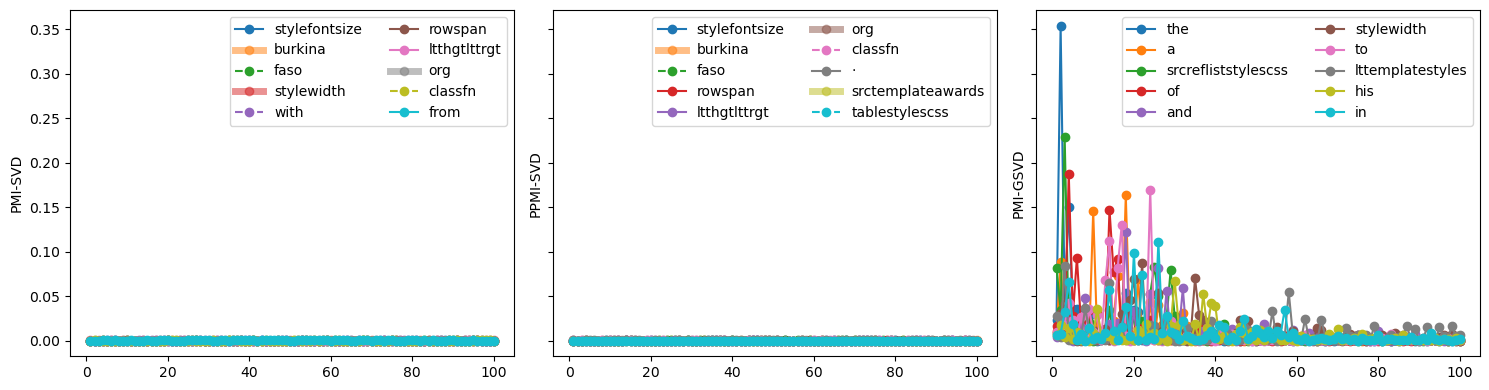

In [68]:
#This is to plot the contributions of rows, corresponding to the extreme values for PMI-SVD, PPMI-SVD, PMI-GSVD. This is used in Figure D.1

colnames = ["PMI-SVD", "PPMI-SVD", "PMI-GSVD"]

fig, axs = plt.subplots(nrows=1, ncols=3,sharey = True, figsize=(15, 4))

num_ext = 10

i = 0
dimred = 100
while i < num_ext:
    if i == (num_ext-1):
        #print(i)
        axs[0].plot(range(1, dimred+1), thr10000_pmi_svd_row_con_firstn_dim[thr10000_pmi_index_abs[i][1][0], 0:dimred], "o-", label = words[thr10000_pmi_index_abs[i][1][0]])
    elif thr10000_pmi_index_abs[i][0][0] == thr10000_pmi_index_abs[i][1][0]:
        axs[0].plot(range(1, dimred+1), thr10000_pmi_svd_row_con_firstn_dim[thr10000_pmi_index_abs[i][0][0], 0:dimred], "o-", label = words[thr10000_pmi_index_abs[i][0][0]])
    elif (thr10000_pmi_index_abs[i][0][0] == thr10000_pmi_index_abs[i+1][1][0]):
        axs[0].plot(range(1, dimred+1), thr10000_pmi_svd_row_con_firstn_dim[thr10000_pmi_index_abs[i][0][0], 0:dimred], "o-", label = words[thr10000_pmi_index_abs[i][0][0]], alpha=0.5, linewidth=5)
        axs[0].plot(range(1, dimred+1), thr10000_pmi_svd_row_con_firstn_dim[thr10000_pmi_index_abs[i+1][0][0], 0:dimred], "o--", label = words[thr10000_pmi_index_abs[i+1][0][0]])
    i = i + 1
i = 0
while i < num_ext-1:
    
    if i == (num_ext-1):
        axs[1].plot(range(1, dimred+1), thr10000_ppmi_svd_row_con_firstn_dim[thr10000_ppmi_index[i][0][0], 0:dimred], "o-", label = words[thr10000_ppmi_index[i][0][0]])
    elif thr10000_ppmi_index[i][0][0] == thr10000_ppmi_index[i][1][0]:
        axs[1].plot(range(1, dimred+1), thr10000_ppmi_svd_row_con_firstn_dim[thr10000_ppmi_index[i][0][0], 0:dimred], "o-", label = words[thr10000_ppmi_index[i][0][0]])
    elif (thr10000_ppmi_index[i][0][0] == thr10000_ppmi_index[i+1][1][0]):
        axs[1].plot(range(1, dimred+1), thr10000_ppmi_svd_row_con_firstn_dim[thr10000_ppmi_index[i][0][0], 0:dimred], "o-", label = words[thr10000_ppmi_index[i][0][0]], alpha=0.5, linewidth=5)
        axs[1].plot(range(1, dimred+1), thr10000_ppmi_svd_row_con_firstn_dim[thr10000_ppmi_index[i+1][0][0], 0:dimred], "o--", label = words[thr10000_ppmi_index[i+1][0][0]])

    #axs[2].plot(range(1, dimred+1), thr10000_pmi_gsvd_row_con_firstn_dim[res_list_thr10000_pmi_gsvd_index[i], 0:dimred], "o-", label = words[res_list_thr10000_pmi_gsvd_index[i]])   
        
    i = i + 1
i = 0    
while i <  num_ext:
    axs[2].plot(range(1, dimred+1), thr10000_pmi_gsvd_row_con_firstn_dim[res_list_thr10000_pmi_gsvd_index[i], 0:dimred], "o-", label = words[res_list_thr10000_pmi_gsvd_index[i]])      
    i = i + 1


    #   plt.plot(range(1, dim+1), thr10000_pmi_svd_row_con_firstn_dim[thr10000_pmi_index_abs[i][0][0] ,:], "o-", label = "RAW-CA: "+words[thr10000_pmi_index_abs[i][0][0]]+" or "+words[thr10000_pmi_index_abs[i][1][0]])
        #print(thr10000_pmi_svd_row_con_firstn_dim[thr10000_pmi_index_abs[i][0][0] ,:])
        #print(thr10000_pmi_svd_row_con_firstn_dim[thr10000_pmi_index_abs[i+1][1][0] ,:])
    
i = 0
for ax in axs:
    ax.set_ylabel(colnames[i])
    ax.legend(ncol=2)
    i = i + 1    
plt.tight_layout()
plt.savefig("thr10000pmiextremevaluecontriabs.png")

# Show the plot
plt.show()

In [4]:
thr10000_pmi = np.load("decomposed matrix\\thr10000_pmi.npy")

thr10000_pmi_fla = thr10000_pmi.flatten()

In [7]:
#Finding the top 10 extrme values, corresponding to the rows for TTEST, ROOT-TTEST, ROOTROOT-TTEST, STRATOS-TTEST of wiki

num_ext = 10
thr10000_ttest_index = [np.where(np.abs(thr10000_ttest) == x) for x in sorted(np.abs(thr10000_ttest_fla[thr10000_pmi_fla != 0]), reverse=True)[:num_ext]]
thr10000_root_ttest_index = [np.where(np.abs(thr10000_root_ttest) == x) for x in sorted(np.abs(thr10000_root_ttest_fla[thr10000_pmi_fla != 0]), reverse=True)[:2*num_ext]]
thr10000_rootroot_ttest_index = [np.where(np.abs(thr10000_rootroot_ttest) == x) for x in sorted(np.abs(thr10000_rootroot_ttest_fla[thr10000_pmi_fla != 0]), reverse=True)[:2*num_ext]]
thr10000_rootcca_index = [np.where(np.abs(thr10000_rootcca) == x) for x in sorted(np.abs(thr10000_rootcca_fla[thr10000_pmi_fla != 0]), reverse=True)[:num_ext]]


In [8]:
thr10000_ttest_index

[(array([15131], dtype=int64), array([15131], dtype=int64)),
 (array([15128], dtype=int64), array([15128], dtype=int64)),
 (array([15106], dtype=int64), array([15106], dtype=int64)),
 (array([15091], dtype=int64), array([14882], dtype=int64)),
 (array([14882], dtype=int64), array([15091], dtype=int64)),
 (array([11844], dtype=int64), array([11845], dtype=int64)),
 (array([11845], dtype=int64), array([11844], dtype=int64)),
 (array([149], dtype=int64), array([1494], dtype=int64)),
 (array([1494], dtype=int64), array([149], dtype=int64)),
 (array([15092], dtype=int64), array([15092], dtype=int64))]

In [9]:
thr10000_root_ttest_index

[(array([15128], dtype=int64), array([15128], dtype=int64)),
 (array([13779], dtype=int64), array([15122], dtype=int64)),
 (array([15122], dtype=int64), array([13779], dtype=int64)),
 (array([14882], dtype=int64), array([15121], dtype=int64)),
 (array([15121], dtype=int64), array([14882], dtype=int64)),
 (array([14882], dtype=int64), array([15120], dtype=int64)),
 (array([15120], dtype=int64), array([14882], dtype=int64)),
 (array([15133], dtype=int64), array([15134], dtype=int64)),
 (array([15134], dtype=int64), array([15133], dtype=int64)),
 (array([14882], dtype=int64), array([15119], dtype=int64)),
 (array([15119], dtype=int64), array([14882], dtype=int64)),
 (array([15115], dtype=int64), array([15126], dtype=int64)),
 (array([15126], dtype=int64), array([15115], dtype=int64)),
 (array([14384, 15124], dtype=int64), array([15124, 14384], dtype=int64)),
 (array([14384, 15124], dtype=int64), array([15124, 14384], dtype=int64)),
 (array([15115], dtype=int64), array([15115], dtype=int64

In [10]:
thr10000_rootroot_ttest_index

[(array([14882], dtype=int64), array([15121], dtype=int64)),
 (array([15121], dtype=int64), array([14882], dtype=int64)),
 (array([14882], dtype=int64), array([15120], dtype=int64)),
 (array([15120], dtype=int64), array([14882], dtype=int64)),
 (array([14389, 14980], dtype=int64), array([14980, 14389], dtype=int64)),
 (array([14389, 14980], dtype=int64), array([14980, 14389], dtype=int64)),
 (array([15115, 15126], dtype=int64), array([15126, 15115], dtype=int64)),
 (array([15115, 15126], dtype=int64), array([15126, 15115], dtype=int64)),
 (array([14384], dtype=int64), array([15124], dtype=int64)),
 (array([15124], dtype=int64), array([14384], dtype=int64)),
 (array([14882], dtype=int64), array([15119], dtype=int64)),
 (array([15119], dtype=int64), array([14882], dtype=int64)),
 (array([14389], dtype=int64), array([14385], dtype=int64)),
 (array([14385], dtype=int64), array([14389], dtype=int64)),
 (array([15134], dtype=int64), array([15133], dtype=int64)),
 (array([15133], dtype=int64)

In [10]:
thr10000_rootcca_index

[(array([15131], dtype=int64), array([15131], dtype=int64)),
 (array([15128], dtype=int64), array([15128], dtype=int64)),
 (array([15106], dtype=int64), array([15106], dtype=int64)),
 (array([14882, 15091], dtype=int64), array([15091, 14882], dtype=int64)),
 (array([14882, 15091], dtype=int64), array([15091, 14882], dtype=int64)),
 (array([11844], dtype=int64), array([11845], dtype=int64)),
 (array([11845], dtype=int64), array([11844], dtype=int64)),
 (array([1494], dtype=int64), array([149], dtype=int64)),
 (array([149], dtype=int64), array([1494], dtype=int64)),
 (array([15092], dtype=int64), array([15092], dtype=int64))]

In [11]:
num_ext = 10
i = 0
while i < num_ext:
    print(i)
    print(words[thr10000_ttest_index[i][0][0]])
    print(words[thr10000_ttest_index[i][1][0]])
    i = i+1

0
stylefontsize
stylefontsize
1
classvcard
classvcard
2
rowspan
rowspan
3
scopecol
stylewidth
4
stylewidth
scopecol
5
burkina
faso
6
faso
burkina
7
gt
srcrefliststylescss
8
srcrefliststylescss
gt
9
scoperow
scoperow


In [12]:
num_ext = 20
i = 0
while i < num_ext:
    print(i)
    print(words[thr10000_root_ttest_index[i][0][0]])
    print(words[thr10000_root_ttest_index[i][1][0]])
    i = i+1

0
classvcard
classvcard
1
srctemplatetooltipstylescss
emlttemplatestyles
2
emlttemplatestyles
srctemplatetooltipstylescss
3
stylewidth
emvotes
4
emvotes
stylewidth
5
stylewidth
emcandidate
6
emcandidate
stylewidth
7
srcstandings
startstylescss
8
startstylescss
srcstandings
9
stylewidth
pxparty
10
pxparty
stylewidth
11
widthpx
bgcolor
12
bgcolor
widthpx
13
styletextalign
marginright
14
styletextalign
marginright
15
widthpx
widthpx
16
gt±
emlttemplatestyles
17
emlttemplatestyles
gt±
18
stylewidth
emlttemplatestyles
19
emlttemplatestyles
stylewidth


In [13]:
num_ext = 20
i = 0
while i < num_ext:
    print(i)
    print(words[thr10000_rootroot_ttest_index[i][0][0]])
    print(words[thr10000_rootroot_ttest_index[i][1][0]])
    i = i+1

0
stylewidth
emvotes
1
emvotes
stylewidth
2
stylewidth
emcandidate
3
emcandidate
stylewidth
4
textalign
backgroundcolortransparent
5
textalign
backgroundcolortransparent
6
widthpx
bgcolor
7
widthpx
bgcolor
8
styletextalign
marginright
9
marginright
styletextalign
10
stylewidth
pxparty
11
pxparty
stylewidth
12
textalign
ffffc
13
ffffc
textalign
14
startstylescss
srcstandings
15
srcstandings
startstylescss
16
gt±
emlttemplatestyles
17
emlttemplatestyles
gt±
18
srctemplatetooltipstylescss
emlttemplatestyles
19
emlttemplatestyles
srctemplatetooltipstylescss


In [14]:
num_ext = 10
i = 0
while i < num_ext:
    print(i)
    print(words[thr10000_rootcca_index[i][0][0]])
    print(words[thr10000_rootcca_index[i][1][0]])
    i = i+1

0
stylefontsize
stylefontsize
1
classvcard
classvcard
2
rowspan
rowspan
3
stylewidth
scopecol
4
stylewidth
scopecol
5
burkina
faso
6
faso
burkina
7
srcrefliststylescss
gt
8
gt
srcrefliststylescss
9
scoperow
scoperow


In [8]:
dim = 100    

thr10000_ca_u = np.load("decomposed matrix\\thr10000_raw_ca_u.npy")
thr10000_ca_s = np.load("decomposed matrix\\thr10000_raw_ca_s.npy")
thr10000_ca_row_con_firstn_dim = ((thr10000_ca_s[0:dim]**2) * (thr10000_ca_u[:,0:dim]**2))/(thr10000_ca_s[0:dim]**2)

thr10000_ca_u_root = np.load("decomposed matrix\\thr10000_root_ca_u.npy")
thr10000_ca_s_root = np.load("decomposed matrix\\thr10000_root_ca_s.npy")
thr10000_ca_root_row_con_firstn_dim = ((thr10000_ca_s_root[0:dim]**2) * (thr10000_ca_u_root[:,0:dim]**2))/(thr10000_ca_s_root[0:dim]**2)

thr10000_ca_u_rootroot = np.load("decomposed matrix\\thr10000_rootroot_ca_u.npy")
thr10000_ca_s_rootroot = np.load("decomposed matrix\\thr10000_rootroot_ca_s.npy")
thr10000_ca_rootroot_row_con_firstn_dim = ((thr10000_ca_s_rootroot[0:dim]**2) * (thr10000_ca_u_rootroot[:,0:dim]**2))/(thr10000_ca_s_rootroot[0:dim]**2)

thr10000_ca_u_rootcca = np.load("decomposed matrix\\thr10000_rootcca_svd_u.npy")
thr10000_ca_s_rootcca = np.load("decomposed matrix\\thr10000_rootcca_svd_s.npy")
thr10000_ca_rootcca_row_con_firstn_dim = ((thr10000_ca_s_rootcca[0:dim]**2) * (thr10000_ca_u_rootcca[:,0:dim]**2))/(thr10000_ca_s_rootcca[0:dim]**2)

In [9]:
thr10000_ca_row_con_firstn_dim[15131,:]

array([6.71628208e-07, 7.88558470e-08, 9.97535911e-01, 1.34841099e-04,
       1.91855138e-04, 6.02142760e-06, 9.10925769e-06, 4.30830042e-09,
       2.34362761e-07, 6.20671101e-09, 5.67937927e-11, 3.49305336e-04,
       6.69343902e-05, 1.06319608e-03, 2.31826145e-11, 2.73115400e-07,
       6.70017538e-06, 1.79368975e-07, 9.13725575e-15, 6.65307461e-06,
       8.17025283e-07, 2.59861626e-10, 4.68528580e-07, 1.43767749e-13,
       8.81241790e-11, 1.36675841e-08, 7.78684318e-09, 6.60799506e-13,
       1.01068232e-08, 4.06054186e-07, 1.02117626e-08, 7.81587208e-08,
       3.02982836e-09, 1.22106784e-10, 7.70561314e-08, 6.24922729e-09,
       8.61265605e-13, 1.81540845e-13, 6.83104240e-08, 2.22760589e-07,
       2.69398987e-09, 7.66158591e-10, 4.54401826e-13, 1.10905318e-09,
       7.64879941e-07, 1.09654104e-11, 1.41672255e-08, 1.01844006e-13,
       2.40287483e-08, 1.46814518e-08, 5.19824472e-10, 9.13630482e-09,
       6.64607636e-09, 7.06571408e-14, 3.59814928e-12, 4.75644827e-11,
      

In [7]:
#load vacobulary of BNC
thr10000_vocab = np.load("vocabthr10000_dic_index.npy", allow_pickle=True)
thr10000_vocab = dict(enumerate(thr10000_vocab.flatten(), 1))[1]
words = []
for i in thr10000_vocab:
    words.append(i)

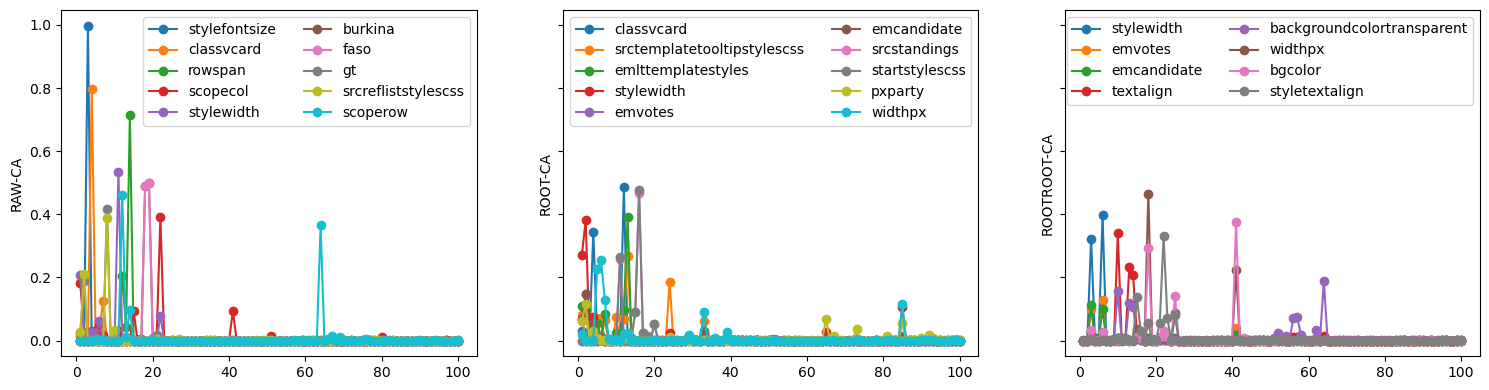

In [8]:
#This is to plot the contributions of rows, corresponding to the extreme values for RAW-CA, ROOT-CA, ROOTROOT-CA. This is used in Figure G.1

colnames = ["RAW-CA", "ROOT-CA", "ROOTROOT-CA"]
fig, axs = plt.subplots(nrows=1, ncols=len(colnames),sharey = True, figsize=(15, 4))


dimred = 100


     #   plt.plot(range(1, dim+1), thr10000_ca_row_con_firstn_dim[thr10000_ttest_index[i][0][0] ,:], "o-", label = "RAW-CA: "+words[thr10000_ttest_index[i][0][0]]+" or "+words[thr10000_ttest_index[i][1][0]])
        #print(thr10000_ca_row_con_firstn_dim[thr10000_ttest_index[i][0][0] ,:])
        #print(thr10000_ca_row_con_firstn_dim[thr10000_ttest_index[i+1][1][0] ,:])

axs[0].plot(range(1, dimred+1), thr10000_ca_row_con_firstn_dim[15131, 0:dimred], "o-", label = words[15131])
axs[0].plot(range(1, dimred+1), thr10000_ca_row_con_firstn_dim[15128, 0:dimred], "o-", label = words[15128])

axs[0].plot(range(1, dimred+1), thr10000_ca_row_con_firstn_dim[15106, 0:dimred], "o-", label = words[15106])
axs[0].plot(range(1, dimred+1), thr10000_ca_row_con_firstn_dim[15091, 0:dimred], "o-", label = words[15091])

axs[0].plot(range(1, dimred+1), thr10000_ca_row_con_firstn_dim[14882, 0:dimred], "o-", label = words[14882])
axs[0].plot(range(1, dimred+1), thr10000_ca_row_con_firstn_dim[11844, 0:dimred], "o-", label = words[11844])

axs[0].plot(range(1, dimred+1), thr10000_ca_row_con_firstn_dim[11845, 0:dimred], "o-", label = words[11845])
axs[0].plot(range(1, dimred+1), thr10000_ca_row_con_firstn_dim[149, 0:dimred], "o-", label = words[149])

axs[0].plot(range(1, dimred+1), thr10000_ca_row_con_firstn_dim[1494, 0:dimred], "o-", label = words[1494])
axs[0].plot(range(1, dimred+1), thr10000_ca_row_con_firstn_dim[15092, 0:dimred], "o-", label = words[15092])


axs[1].plot(range(1, dimred+1), thr10000_ca_root_row_con_firstn_dim[15128, 0:dimred], "o-", label = words[15128])
axs[1].plot(range(1, dimred+1), thr10000_ca_root_row_con_firstn_dim[13779, 0:dimred], "o-", label = words[13779])

axs[1].plot(range(1, dimred+1), thr10000_ca_root_row_con_firstn_dim[15122, 0:dimred], "o-", label = words[15122])
axs[1].plot(range(1, dimred+1), thr10000_ca_root_row_con_firstn_dim[14882, 0:dimred], "o-", label = words[14882])

axs[1].plot(range(1, dimred+1), thr10000_ca_root_row_con_firstn_dim[15121, 0:dimred], "o-", label = words[15121])
axs[1].plot(range(1, dimred+1), thr10000_ca_root_row_con_firstn_dim[15120, 0:dimred], "o-", label = words[15120])

axs[1].plot(range(1, dimred+1), thr10000_ca_root_row_con_firstn_dim[15133, 0:dimred], "o-", label = words[15133])
axs[1].plot(range(1, dimred+1), thr10000_ca_root_row_con_firstn_dim[15134, 0:dimred], "o-", label = words[15134])

axs[1].plot(range(1, dimred+1), thr10000_ca_root_row_con_firstn_dim[15119, 0:dimred], "o-", label = words[15119])
axs[1].plot(range(1, dimred+1), thr10000_ca_root_row_con_firstn_dim[15115, 0:dimred], "o-", label = words[15115])
    

axs[2].plot(range(1, dimred+1), thr10000_ca_rootroot_row_con_firstn_dim[14882, 0:dimred], "o-", label = words[14882])
axs[2].plot(range(1, dimred+1), thr10000_ca_rootroot_row_con_firstn_dim[15121, 0:dimred], "o-", label = words[15121])

axs[2].plot(range(1, dimred+1), thr10000_ca_rootroot_row_con_firstn_dim[15120, 0:dimred], "o-", label = words[15120])
axs[2].plot(range(1, dimred+1), thr10000_ca_rootroot_row_con_firstn_dim[14389, 0:dimred], "o-", label = words[14389])

axs[2].plot(range(1, dimred+1), thr10000_ca_rootroot_row_con_firstn_dim[14980, 0:dimred], "o-", label = words[14980])
axs[2].plot(range(1, dimred+1), thr10000_ca_rootroot_row_con_firstn_dim[15115, 0:dimred], "o-", label = words[15115])
                                                                        
axs[2].plot(range(1, dimred+1), thr10000_ca_rootroot_row_con_firstn_dim[15126, 0:dimred], "o-", label = words[15126])
axs[2].plot(range(1, dimred+1), thr10000_ca_rootroot_row_con_firstn_dim[14384, 0:dimred], "o-", label = words[14384])
                                                                        
                                                                        
i = 0
for ax in axs:
    ax.set_ylabel(colnames[i])
    ax.legend(ncol=2)
    i = i + 1    

plt.tight_layout()
plt.savefig("thr10000caextremevaluecontri.png")

# Show the plot
plt.show()

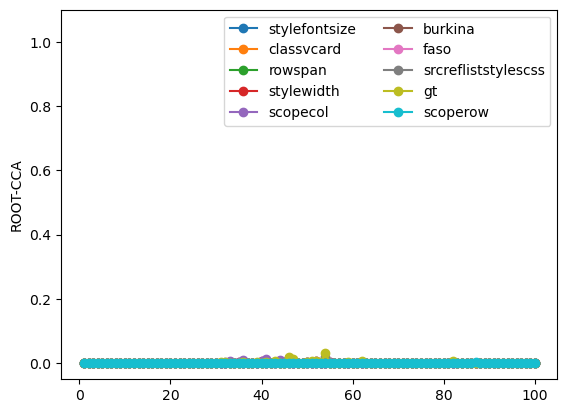

In [9]:
#This is to plot the contributions of rows, corresponding to the extreme values for ROOT-CCA. This is used in Figure G.2

i = 0
dimred = 100
plt.plot(range(1, dimred+1), thr10000_ca_rootcca_row_con_firstn_dim[15131, 0:dimred], "o-", label = words[15131])
plt.plot(range(1, dimred+1), thr10000_ca_rootcca_row_con_firstn_dim[15128, 0:dimred], "o-", label = words[15128])

plt.plot(range(1, dimred+1), thr10000_ca_rootcca_row_con_firstn_dim[15106, 0:dimred], "o-", label = words[15106])
plt.plot(range(1, dimred+1), thr10000_ca_rootcca_row_con_firstn_dim[14882, 0:dimred], "o-", label = words[14882])

plt.plot(range(1, dimred+1), thr10000_ca_rootcca_row_con_firstn_dim[15091, 0:dimred], "o-", label = words[15091])
plt.plot(range(1, dimred+1), thr10000_ca_rootcca_row_con_firstn_dim[11844, 0:dimred], "o-", label = words[11844])

plt.plot(range(1, dimred+1), thr10000_ca_rootcca_row_con_firstn_dim[11845, 0:dimred], "o-", label = words[11845])
plt.plot(range(1, dimred+1), thr10000_ca_rootcca_row_con_firstn_dim[1494, 0:dimred], "o-", label = words[1494])

plt.plot(range(1, dimred+1), thr10000_ca_rootcca_row_con_firstn_dim[149, 0:dimred], "o-", label = words[149])
plt.plot(range(1, dimred+1), thr10000_ca_rootcca_row_con_firstn_dim[15092, 0:dimred], "o-", label = words[15092])

    

plt.ylabel("ROOT-CCA")
plt.legend(ncol=2)
plt.ylim(-0.05, 1.1)
plt.savefig("thr10000rootccaextremevaluecontri.png")

# Show the plot
plt.show()